# Find and Visualize clusters with K-Means 
This template helps you identify and visualize clusters in your data. The K Means algorithm aims to assign the data points in your dataset to K distinct clusters. After running the algorithm each observation (data point) will belong to the cluster whose center it is closest to.

In [2]:
# Load packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

In [3]:
# Upload your data as a csv file and load it as a data frame 
df = pd.read_csv('penguins.csv').dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


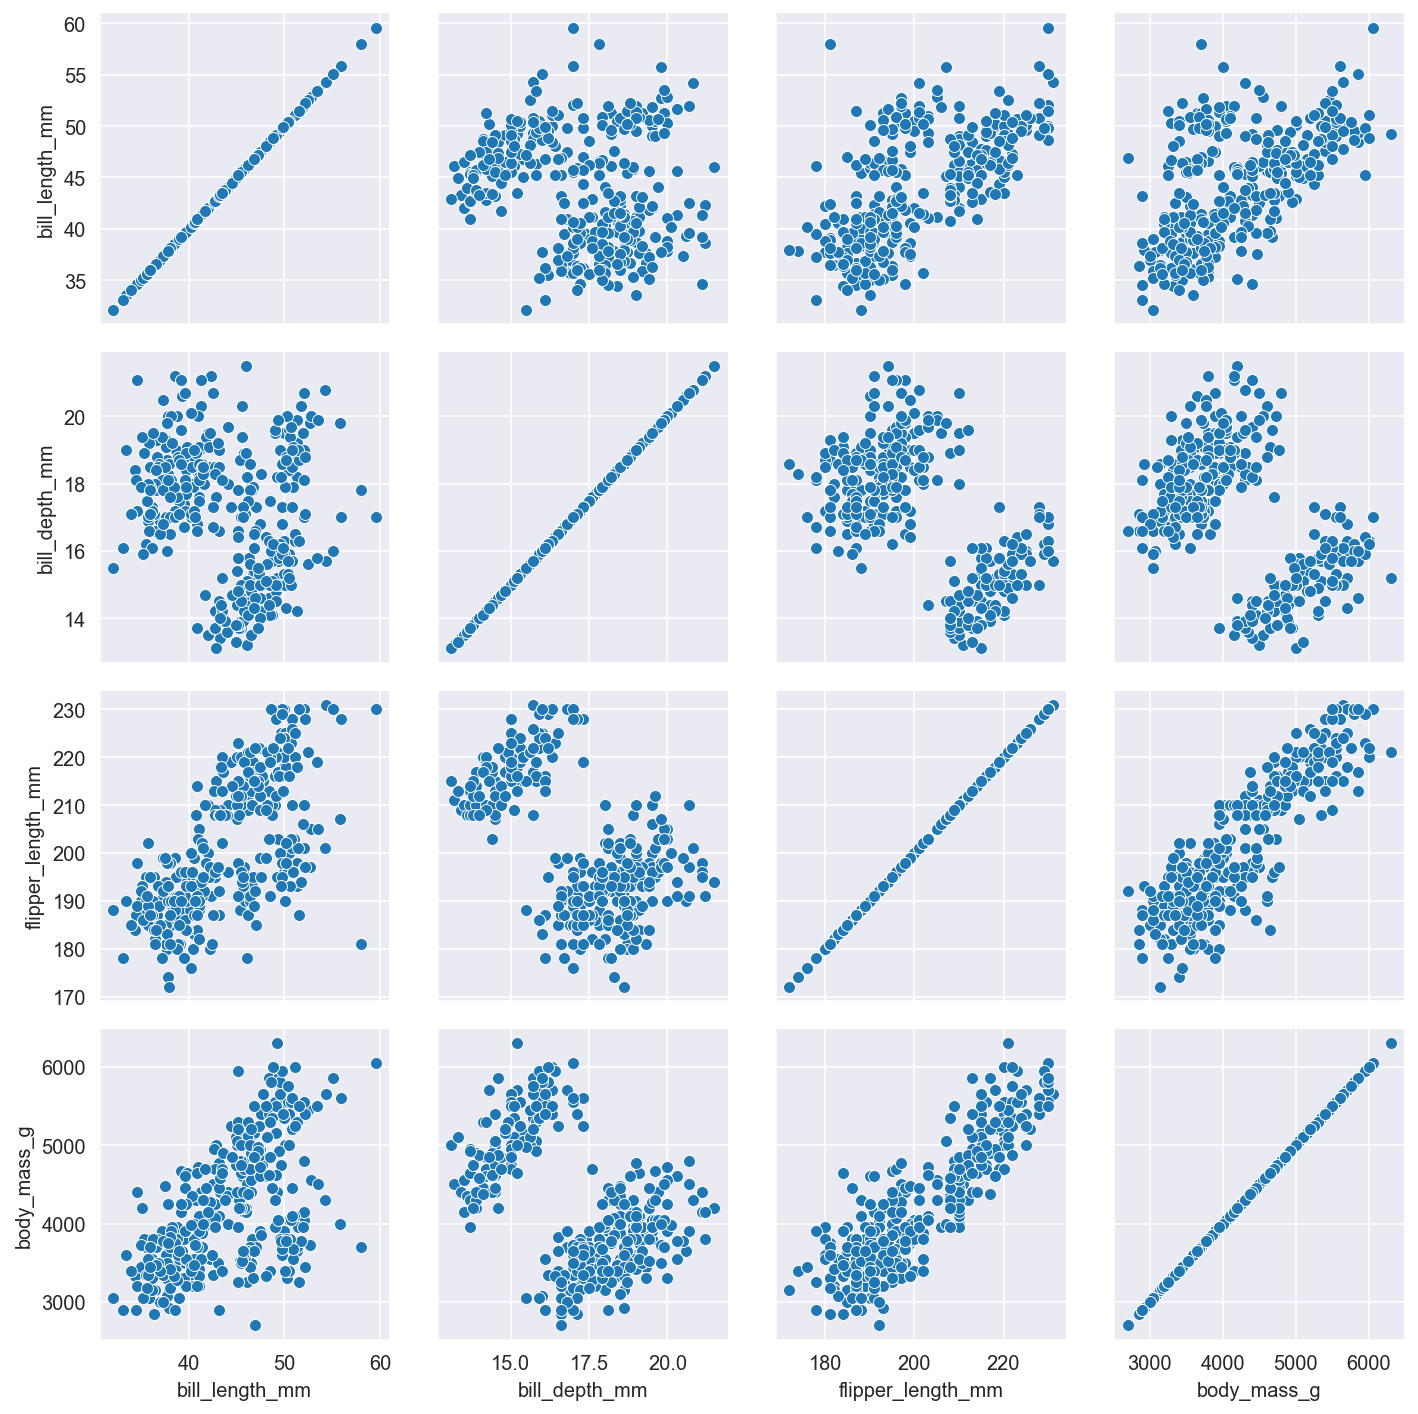

In [4]:
# Visualize the correlation your data and identify variables for further analysis
g = sns.PairGrid(df)
g.map(sns.scatterplot);

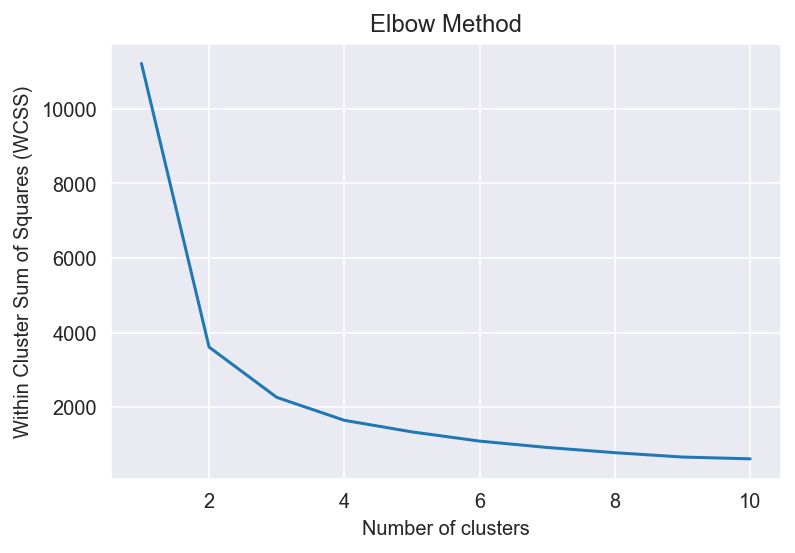

In [5]:
X = np.array(df.loc[:,['bill_length_mm',                # Choose your variable names
                       'bill_depth_mm']])    \
                        .reshape(-1, 2)

# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

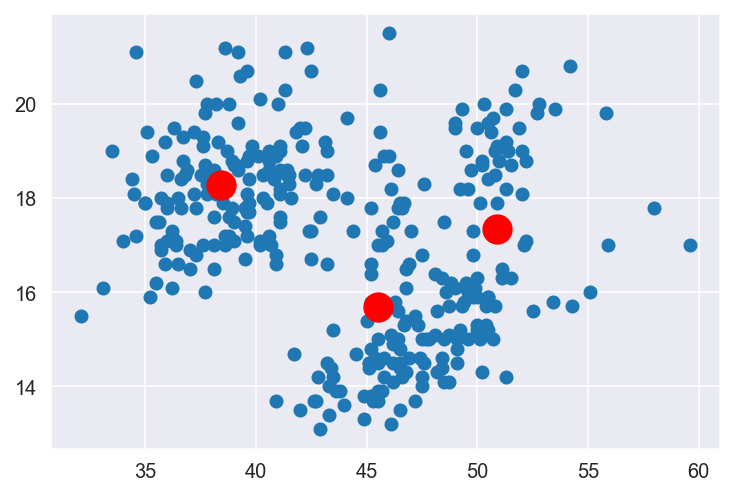

In [8]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)


# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()